In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
path='/content/drive/MyDrive/RentPrediction.csv'
df=pd.read_csv('/content/drive/MyDrive/RentPrediction.csv')
# Dataset is now stored in a Pandas Dataframe
df.describe


<bound method NDFrame.describe of              id  ... availability_365
0       5728806  ...                0
1       2243769  ...                0
2      35515415  ...              365
3      36202006  ...               82
4       3780951  ...              365
...         ...  ...              ...
34221  28342248  ...                0
34222   8438775  ...               32
34223  27332770  ...                0
34224   9063972  ...                0
34225  13372860  ...                0

[34226 rows x 14 columns]>

In [4]:
#Loading csv file
df =pd.read_csv('/content/drive/MyDrive/RentPrediction.csv')
#To read the first 5 rows
df.head()


,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,5728806,Large private room in Nolita,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,0.06,3,0
1,2243769,Super Bowl New York City Apartment,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1,0,NaN,1,0
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4,4.00,1,365
3,36202006,Stream-Pressed Paradise (Laundry Room Setup),Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0,NaN,4,82
4,3780951,Charming Harlem apartment,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,0.27,1,365


In [5]:
#to read the bottom 5 rows
df.tail()


,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
34221,28342248,Ridgewood retreat,Sophie,Queens,Ridgewood,40.70602,-73.90485,Entire home/apt,80,5,2,0.21,1,0
34222,8438775,Private BR & Bath near Central Park,Gabi,Manhattan,Upper West Side,40.77697,-73.97698,Private room,137,1,163,3.55,1,32
34223,27332770,Warm Home w/ Private Garden (Inwood Manhattan ...,Mary,Manhattan,Inwood,40.86912,-73.92183,Entire home/apt,195,2,6,0.53,1,0
34224,9063972,Chill Bushwick Suite,Olu Bliss,Brooklyn,Bushwick,40.69709,-73.91435,Private room,80,3,0,NaN,1,0
34225,13372860,Cozy and simple Bedstuy studio right by the train,Ashton,Brooklyn,Bedford-Stuyvesant,40.69076,-73.92886,Entire home/apt,69,4,5,0.13,1,0


In [ ]:
#information about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34226 entries, 0 to 34225
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34226 non-null  int64  
 1   name                            34214 non-null  object 
 2   host_name                       34213 non-null  object 
 3   neighbourhood_group             34226 non-null  object 
 4   neighbourhood                   34226 non-null  object 
 5   latitude                        34226 non-null  float64
 6   longitude                       34226 non-null  float64
 7   room_type                       34226 non-null  object 
 8   price                           34226 non-null  int64  
 9   minimum_nights                  34226 non-null  int64  
 10  number_of_reviews               34226 non-null  int64  
 11  reviews_per_month               27244 non-null  float64
 12  calculated_host_listings_count  

In [6]:
#Statistical description
df.describe(include=np.object)

,name,host_name,neighbourhood_group,neighbourhood,room_type
count,34214,34213,34226,34226,34226
unique,33660,9290,5,217,3
top,Home away from home,Michael,Manhattan,Williamsburg,Entire home/apt
freq,13,291,15193,2756,17829


In [8]:
#To display the name of the columns
df.columns

Index(['id', 'name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [7]:
#Shape of the dataset (rows,columns)
df.shape

(34226, 14)

In [9]:
#to find the total number of null values
df.isnull().sum()

id                                   0
name                                12
host_name                           13
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 6982
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [10]:
#To find the unique values in a categorical column
df['neighbourhood_group'].unique()

array(['Manhattan', 'Queens', 'Staten Island', 'Brooklyn', 'Bronx'],
      dtype=object)

In [11]:
#To find the number of unique values 
df['neighbourhood_group'].nunique()


5

COLUMN OPERATIONS

In [12]:
#Selection of a column
df[['room_type']]


,room_type
0,Private room
1,Entire home/apt
2,Entire home/apt
3,Shared room
4,Shared room
...,...
34221,Entire home/apt
34222,Private room
34223,Entire home/apt
34224,Private room


In [13]:
#Making a new column-total listings possible -used during feature engineering process 
df['Total_listings']=df['availability_365']/df['minimum_nights']
df.head(7)

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Total_listings
0,5728806,Large private room in Nolita,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,0.06,3,0,0.000000
1,2243769,Super Bowl New York City Apartment,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1,0,NaN,1,0,0.000000
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4,4.00,1,365,182.500000
3,36202006,Stream-Pressed Paradise (Laundry Room Setup),Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0,NaN,4,82,41.000000
4,3780951,Charming Harlem apartment,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,0.27,1,365,365.000000
5,9944426,Lower Manhattan Luxury,Dax,Manhattan,Battery Park City,40.71192,-74.01572,Entire home/apt,225,90,1,0.02,1,362,4.022222
6,19786915,Spacious Clean Studio Apartment,Marian,Queens,Rosedale,40.65766,-73.72838,Entire home/apt,60,1,57,2.41,1,336,336.000000


In [14]:
#Deleting a column
df.drop(['Total_listings'], axis=1, inplace=True)

In [15]:
df.head(2)


,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,5728806,Large private room in Nolita,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,0.06,3,0
1,2243769,Super Bowl New York City Apartment,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1,0,NaN,1,0


In [16]:
df.head(3)   #hostname is set as index 

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,5728806,Large private room in Nolita,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,0.06,3,0
1,2243769,Super Bowl New York City Apartment,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1,0,NaN,1,0
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4,4.00,1,365


In [17]:
#Rename a column
df.rename(columns = {'calculated_host_listings_count':'host_listing', 'availability_365': 'availability'}, inplace = True)

ROW OPERATIONS

In [18]:
#Locating a row
#df.loc['Brian']     #index

#Locate using row number
#df.iloc[1]     #row number

In [19]:
#Function to find total values in each category
df['room_type'].value_counts()

Entire home/apt    17829
Private room       15594
Shared room          803
Name: room_type, dtype: int64

In [20]:
#Conditional filtering - view only the data from Bronx neighbourhood group
df[df['neighbourhood_group'] == 'Manhattan']

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,host_listing,availability
0,5728806,Large private room in Nolita,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,0.06,3,0
1,2243769,Super Bowl New York City Apartment,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1,0,NaN,1,0
4,3780951,Charming Harlem apartment,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,0.27,1,365
5,9944426,Lower Manhattan Luxury,Dax,Manhattan,Battery Park City,40.71192,-74.01572,Entire home/apt,225,90,1,0.02,1,362
8,17174519,Chelsea Brownstone 3 Bedroom House,Wade,Manhattan,Chelsea,40.74443,-74.00012,Entire home/apt,650,3,35,1.61,2,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34217,15085833,Brand New 1 Bedroom NYC Apartment & Outside Space,Bryan,Manhattan,Harlem,40.80466,-73.95582,Entire home/apt,399,3,1,0.03,1,364
34218,13124637,Private BR in a 2 BR Central Park West,Vanessa,Manhattan,Upper West Side,40.79613,-73.96658,Private room,60,2,23,0.62,1,0
34219,33993225,Private small room in 3 bdr apt - East Village,Alexandre,Manhattan,East Village,40.72613,-73.98447,Private room,99,1,9,3.42,5,30
34222,8438775,Private BR & Bath near Central Park,Gabi,Manhattan,Upper West Side,40.77697,-73.97698,Private room,137,1,163,3.55,1,32


In [21]:
#Conditional filtering - View houses from Manhattan whose price is 1500 
df[(df['neighbourhood_group'] == 'Manhattan') & (df['price'] == 1500) & (df['minimum_nights'] == 1)]

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,host_listing,availability
1,2243769,Super Bowl New York City Apartment,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1,0,NaN,1,0
3776,29486682,Loft Space with Incredible Windows,Greg,Manhattan,Chinatown,40.71722,-74.00293,Entire home/apt,1500,1,0,NaN,1,365
6914,1989838,Luxury 4 BD NYC Times Sq Apartment,Patrick,Manhattan,Midtown,40.76316,-73.98109,Entire home/apt,1500,1,0,NaN,1,0
26307,22795221,Gorgeous natural light in Chelsea photo studio,Kevin,Manhattan,Chelsea,40.75021,-74.00479,Entire home/apt,1500,1,0,NaN,6,0
26867,2276065,PERFECT SUPERBOWL STAY,Shaunna,Manhattan,Midtown,40.75225,-73.98725,Entire home/apt,1500,1,0,NaN,1,0
30769,7603640,Brand new in the heart of Tribeca,Benjamin,Manhattan,Tribeca,40.71978,-74.00968,Private room,1500,1,0,NaN,1,365
33690,2217398,"226 E 29th St, NY - Super Bowl",Andrew,Manhattan,Kips Bay,40.74262,-73.97945,Entire home/apt,1500,1,0,NaN,1,0


In [22]:
#Apply function - to change 'Entire home/apt' to 'Entire home'
df['room_type'] = df['room_type'].apply(lambda x: x.strip('/apt'))
df.head(6)

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,host_listing,availability
0,5728806,Large private room in Nolita,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,0.06,3,0
1,2243769,Super Bowl New York City Apartment,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home,1500,1,0,NaN,1,0
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home,200,2,4,4.00,1,365
3,36202006,Stream-Pressed Paradise (Laundry Room Setup),Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0,NaN,4,82
4,3780951,Charming Harlem apartment,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,0.27,1,365
5,9944426,Lower Manhattan Luxury,Dax,Manhattan,Battery Park City,40.71192,-74.01572,Entire home,225,90,1,0.02,1,362


In [ ]:
#Checking our changes made
df.head(3)

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,host_listing,availability
0,5728806,Large private room in Nolita,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,0.06,3,0
1,2243769,Super Bowl New York City Apartment,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home,1500,1,0,NaN,1,0
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home,200,2,4,4.00,1,365


In [23]:
#Groupby function - to find the mean prices for each neighbourhood group
df.groupby('neighbourhood_group')[['price']].mean().sort_values(by='price', ascending = True)

,price
neighbourhood_group,
Bronx,88.146023
Queens,98.661731
Staten Island,118.491935
Brooklyn,125.868880
Manhattan,197.233002


In [24]:
df.head()


,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,host_listing,availability
0,5728806,Large private room in Nolita,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,0.06,3,0
1,2243769,Super Bowl New York City Apartment,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home,1500,1,0,NaN,1,0
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home,200,2,4,4.00,1,365
3,36202006,Stream-Pressed Paradise (Laundry Room Setup),Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0,NaN,4,82
4,3780951,Charming Harlem apartment,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,0.27,1,365


UNIVARIATE ANALYSIS 
1 How are houses distributed in different neighbourhood groups?
2 Which room type is listed the most?
3 How is price distributed throughout the dataset?
4 availability distribution

BIVARIATE ANALYSIS 
1 Price VS minimum_nights
2 neighbourhood_group and room_type
3 latitude and Longitude


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline   

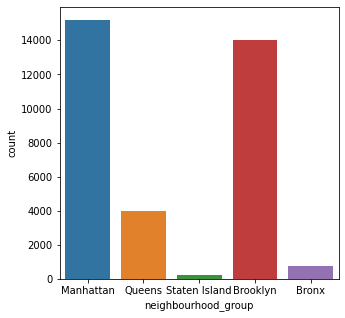

In [26]:
#plotting distribution of dataset based on neighbourhood_group
plt.figure(figsize = (5,5))
sns.countplot(x="neighbourhood_group", data=df)
plt.show()

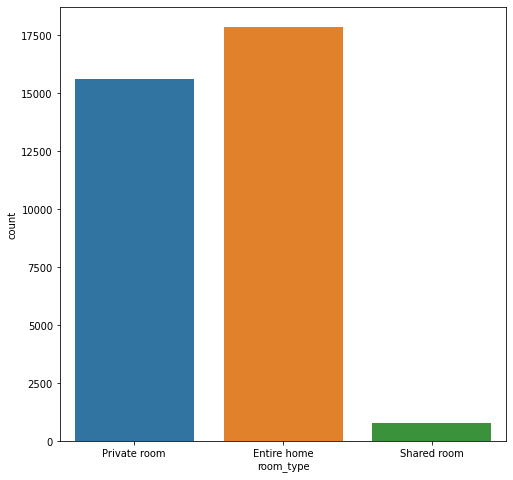

In [27]:
#Plotting distribution of the dataset based on room_type
plt.figure(figsize = (8,8))
sns.countplot(x='room_type', data=df)
plt.show()

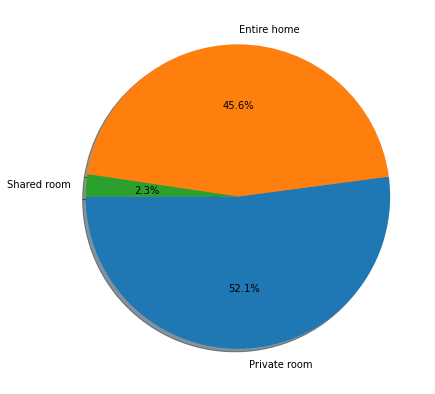

In [28]:
#pie chart for the same
fig1, ax1 = plt.subplots(figsize = (7,7))
ax1.pie(df['room_type'].value_counts(),labels = df['room_type'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=180)
plt.show()

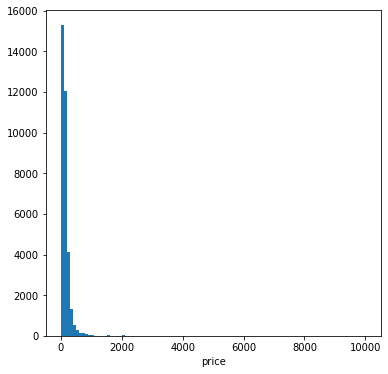

In [29]:
#Price distribution
plt.figure(figsize=(6,6))
plt.hist(df['price'], bins = 100)
plt.xlabel('price')
plt.show()

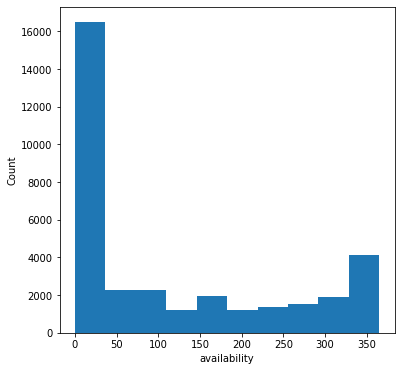

In [30]:
#Plotting a histogram for availability_365 column
plt.figure(figsize=(6,6))
plt.hist(df['availability'])
plt.xlabel('availability')
plt.ylabel('Count')
plt.show()

Bivariate Analysis

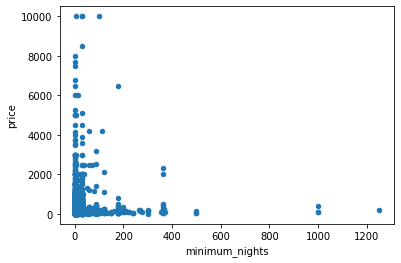

In [31]:
#price VS minimum_nights
df.plot.scatter(y = 'price', x = 'minimum_nights' )
plt.show()

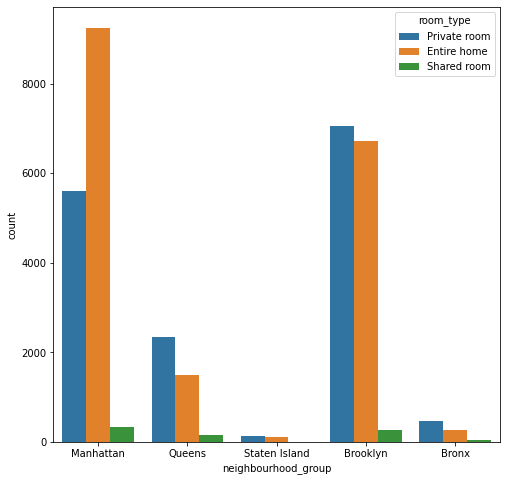

In [33]:
#Plotting distribution of the dataset based on neighbourhood_group and room_type
plt.figure(figsize = (8,8))
sns.countplot(x="neighbourhood_group",hue = 'room_type', data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Neighbourhood Group Location')

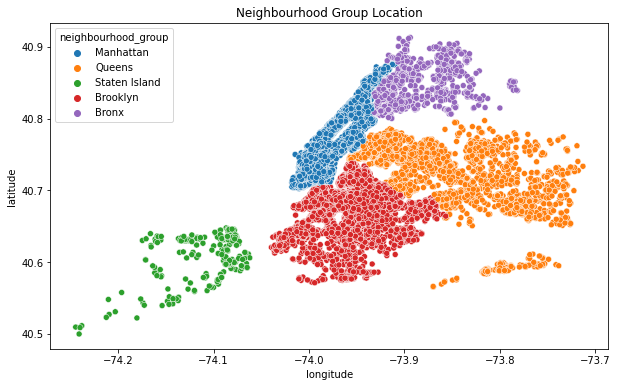

In [34]:
#Checking the location of neighbourhood_group
title = 'Neighbourhood Group Location'
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group).set_title(title)

Data Cleaning
1 price column consists of outliers
2 replace reviews_per_month null values with 0
3 outliers in availability
4 minimum_nights outliers
5 one_hot_encoding


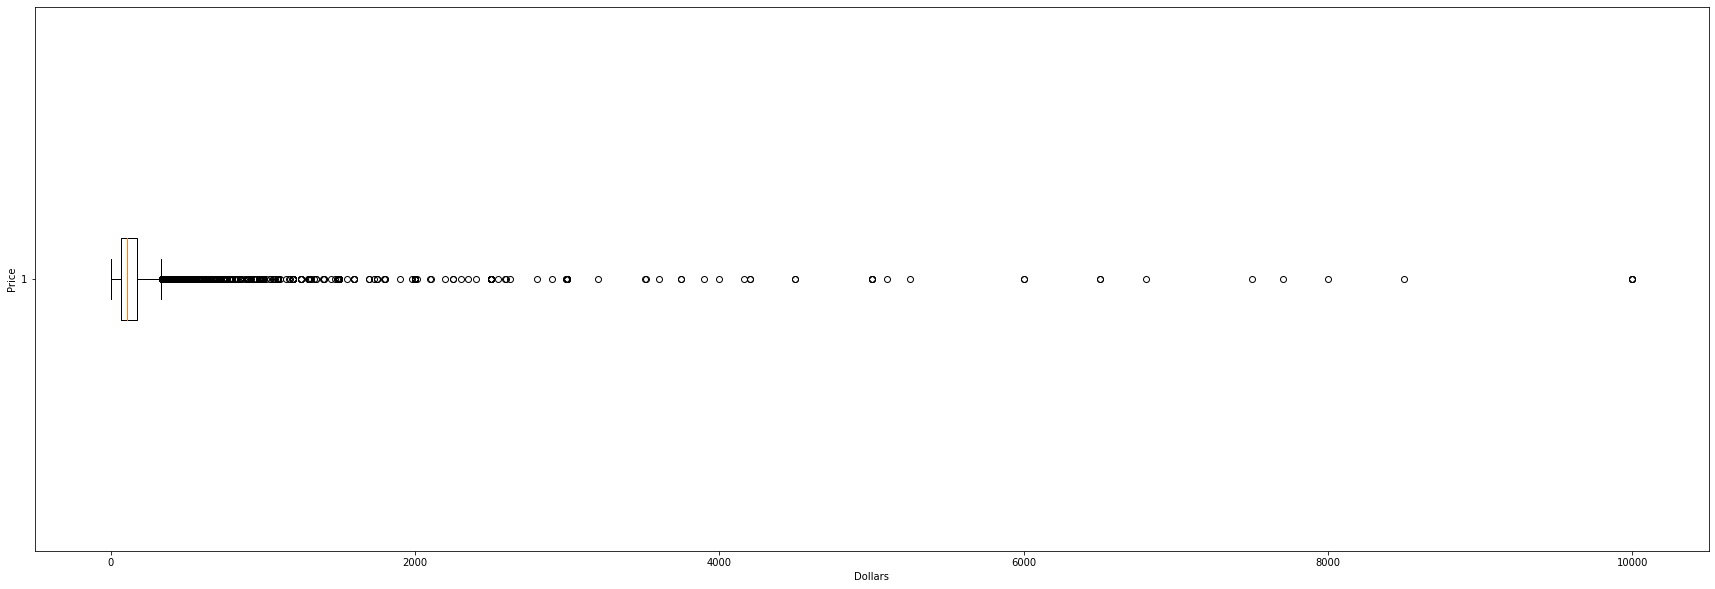

In [35]:
#boxplot for checking the price distribution
plt.figure(figsize = (30,10))
plt.boxplot(df['price'], vert = False)
plt.ylabel('Price')
plt.xlabel('Dollars')
plt.show()

In [37]:
#Dropping rows with #high price
df.drop(df[df['price']>6000].index, inplace = True)
df.sort_values(['price'], ascending = False, axis = 0).head(10)

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,host_listing,availability
11576,12520066,Luxury townhouse Greenwich Village,Linda,Manhattan,Greenwich Village,40.73046,-73.99562,Entire home,6000,1,0,NaN,1,0
4969,2110145,UWS 1BR w/backyard + block from CP,Jay And Liz,Manhattan,Upper West Side,40.77782,-73.97848,Entire home,6000,14,17,0.27,1,359
31865,2243699,"SuperBowl Penthouse Loft 3,000 sqft",Omri,Manhattan,Little Italy,40.71895,-73.99793,Entire home,5250,1,0,NaN,1,0
6868,33397385,Midtown Manhattan great location (Gramacy park),Debra,Manhattan,Midtown,40.74482,-73.98367,Entire home,5100,30,1,1.00,2,343
14648,21238053,Broadway 1,Sarah-B,Brooklyn,Bedford-Stuyvesant,40.68742,-73.91957,Entire home,5000,2,8,0.38,1,0
14314,18051877,Victorian Film location,Alissa,Staten Island,Randall Manor,40.63952,-74.09730,Entire home,5000,1,0,NaN,1,344
28944,2919330,NearWilliamsburg bridge 11211 BK,Bianca,Brooklyn,Bedford-Stuyvesant,40.69572,-73.95731,Private room,5000,6,10,0.16,1,363
24593,20654227,Fulton 2,Sarah-2,Brooklyn,Cypress Hills,40.68185,-73.88128,Entire home,5000,2,4,0.18,1,0
15704,35345358,Northside Williamsburg Stunner,Alex,Brooklyn,Williamsburg,40.71705,-73.96470,Entire home,4500,30,0,NaN,1,365
6600,2952861,Photography Location,Jessica,Brooklyn,Clinton Hill,40.69127,-73.96563,Entire home,4500,1,5,0.09,11,365


In [38]:
#Dropping rows with min price i.e. 0
df.drop(df[df['price']==0].index, inplace = True)
df.sort_values(['price'], ascending = True, axis = 0).head(5)

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,host_listing,availability
4546,26496645,Room with a view,Martin,Brooklyn,Williamsburg,40.70959,-73.95693,Private room,10,1,0,NaN,1,83
5582,17979764,Jen Apt,Jennifer,Manhattan,SoHo,40.72237,-73.99817,Private room,10,5,2,0.07,1,0
23016,25839759,Gigantic Sunny Room in Park Slope-Private Back...,Rachel,Brooklyn,Sunset Park,40.66242,-73.99464,Entire home,10,1,14,1.06,1,4
13778,28071998,Cozy room in a three-bedroom House,Arthur,Queens,Woodhaven,40.69139,-73.86086,Private room,10,7,4,0.41,2,180
26499,35642891,Beautiful room in Bushwick,Julio,Brooklyn,Bushwick,40.69640,-73.91898,Private room,10,1,2,2.00,1,0


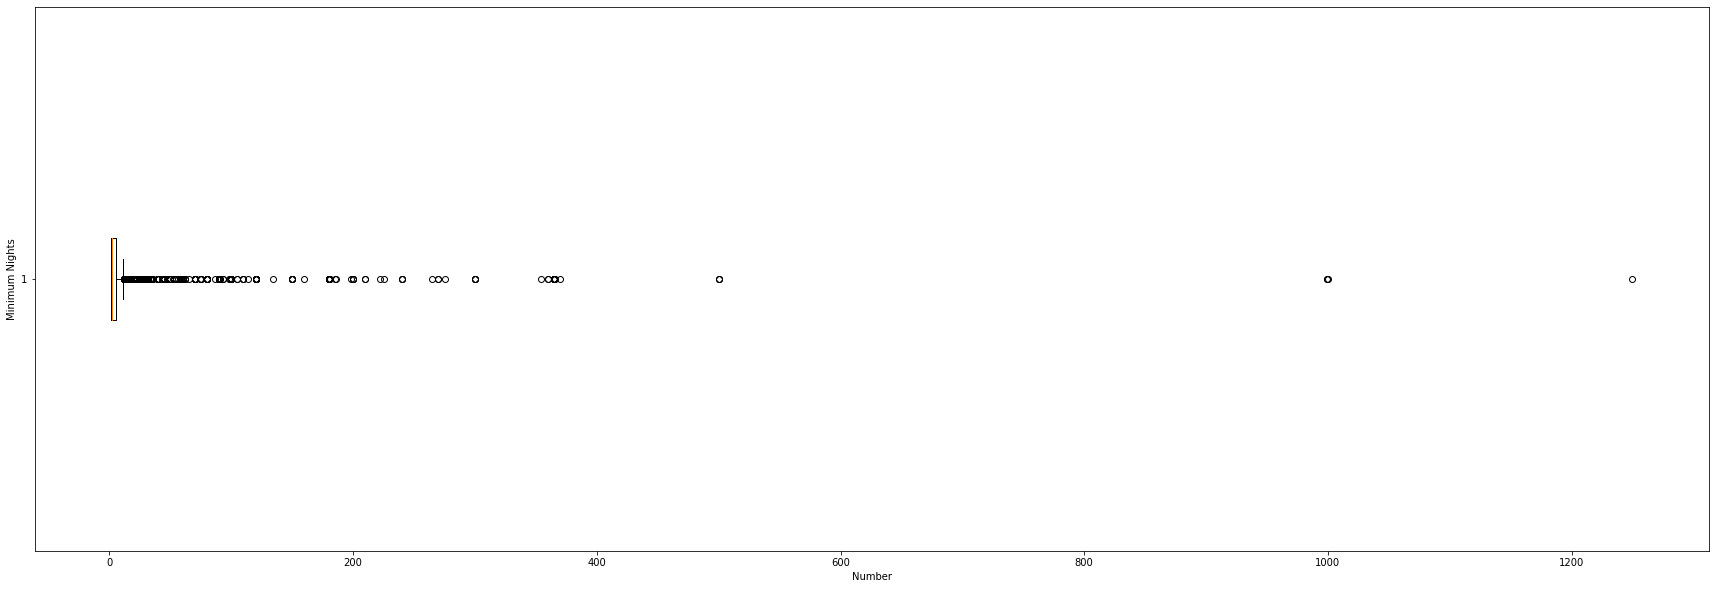

In [39]:
#boxplot for checking minimum_nights
plt.figure(figsize = (30,10))
plt.boxplot(df['minimum_nights'], vert = False)
plt.ylabel('Minimum Nights')
plt.xlabel('Number')
plt.show()

In [40]:
#dropping rows with minimum_nights > 800
df.drop(df[df['minimum_nights']>800].index, inplace = True)
df.sort_values('minimum_nights', ascending = False)[:5]

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,host_listing,availability
6184,6169897,Wonderful Large 1 bedroom,John,Manhattan,Harlem,40.82135,-73.95521,Entire home,75,500,0,NaN,1,362
19816,8668115,Zen Room in Crown Heights Brooklyn,Laura,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50,500,10,0.22,1,365
17336,35834935,Williamsburg Apartment,Meg,Brooklyn,Williamsburg,40.70898,-73.94885,Entire home,140,500,0,NaN,1,331
6743,568684,800sqft apartment with huge terrace,Alessandra,Brooklyn,Bushwick,40.70202,-73.92402,Entire home,115,370,6,0.09,1,365
14568,12888849,"Bright Luxury Studio, Central Loc.",Sarah,Manhattan,Midtown,40.74513,-73.98475,Entire home,250,366,0,NaN,1,365


In [44]:
#percent#age of null values
(df.isnull().sum()/len(df))*100

id                     0.000000
name                   0.032162
host_name              0.038009
neighbourhood_group    0.000000
neighbourhood          0.000000
latitude               0.000000
longitude              0.000000
room_type              0.000000
price                  0.000000
minimum_nights         0.000000
number_of_reviews      0.000000
reviews_per_month      0.000000
host_listing           0.000000
availability           0.000000
dtype: float64

In [43]:
#Replacing null values with 0
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

In [45]:
#availability outliers
df[df['availability']==0].count()

id                     12252
name                   12244
host_name              12244
neighbourhood_group    12252
neighbourhood          12252
latitude               12252
longitude              12252
room_type              12252
price                  12252
minimum_nights         12252
number_of_reviews      12252
reviews_per_month      12252
host_listing           12252
availability           12252
dtype: int64

We will lose valuable information if we drop rows with 0 availability


In [46]:
df.dtypes

id                       int64
name                    object
host_name               object
neighbourhood_group     object
neighbourhood           object
latitude               float64
longitude              float64
room_type               object
price                    int64
minimum_nights           int64
number_of_reviews        int64
reviews_per_month      float64
host_listing             int64
availability             int64
dtype: object

Categorical columns to be encoded

1neighbourhood_group
2 neighbourhood
3 room_type

In [47]:
#neighbourhood_group encoding
group_dummies =pd.get_dummies(df['neighbourhood_group'])
df = pd.concat([df,group_dummies], axis = 'columns')

In [48]:
df.head()

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,host_listing,availability,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,5728806,Large private room in Nolita,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,0.06,3,0,0,0,1,0,0
1,2243769,Super Bowl New York City Apartment,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home,1500,1,0,0.00,1,0,0,0,1,0,0
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home,200,2,4,4.00,1,365,0,0,0,1,0
3,36202006,Stream-Pressed Paradise (Laundry Room Setup),Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0,0.00,4,82,0,0,0,0,1
4,3780951,Charming Harlem apartment,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,0.27,1,365,0,0,1,0,0


In [49]:
#room_type encoding
room_dummies =pd.get_dummies(df['room_type'])
df = pd.concat([df,room_dummies], axis = 'columns')
df.head()

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,host_listing,availability,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home,Private room,Shared room
0,5728806,Large private room in Nolita,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,0.06,3,0,0,0,1,0,0,0,1,0
1,2243769,Super Bowl New York City Apartment,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home,1500,1,0,0.00,1,0,0,0,1,0,0,1,0,0
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home,200,2,4,4.00,1,365,0,0,0,1,0,1,0,0
3,36202006,Stream-Pressed Paradise (Laundry Room Setup),Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0,0.00,4,82,0,0,0,0,1,0,0,1
4,3780951,Charming Harlem apartment,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,0.27,1,365,0,0,1,0,0,0,0,1


In [58]:
df.drop('neighbourhood_group', axis = 1, inplace = True)

In [60]:
df.drop('room_type', axis = 1, inplace = True)

In [61]:
df.drop('id', axis = 1, inplace = True)

In [62]:
df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,host_listing,availability,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home,Private room,Shared room
0,40.72217,-73.99481,120,7,3,0.06,3,0,0,0,1,0,0,0,1,0
1,40.80020,-73.96045,1500,1,0,0.00,1,0,0,0,1,0,0,1,0,0
2,40.75558,-73.89316,200,2,4,4.00,1,365,0,0,0,1,0,1,0,0
3,40.60110,-74.07830,30,2,0,0.00,4,82,0,0,0,0,1,0,0,1
4,40.81022,-73.94266,115,1,16,0.27,1,365,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34221,40.70602,-73.90485,80,5,2,0.21,1,0,0,0,0,1,0,1,0,0
34222,40.77697,-73.97698,137,1,163,3.55,1,32,0,0,1,0,0,0,1,0
34223,40.86912,-73.92183,195,2,6,0.53,1,0,0,0,1,0,0,1,0,0
34224,40.69709,-73.91435,80,3,0,0.00,1,0,0,1,0,0,0,0,1,0


BUILDING MODEL

In [63]:
X = df.drop(['price'], axis = 1)   #independent
y = df['price']    #dependent/target

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [66]:
#Model Building
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

#training model
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)

In [67]:
y_pred

array([112.34009791, 198.37441153,  61.37776761, ..., 189.51984195,
       236.50390876, 198.17198004])

In [68]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

70.4814992596514